MUSIC_Search Practice

### TF-IDF練習:使用2017年國慶小提琴新聞

In [92]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [93]:
text_list = read_text_folder("./data/")
print("document number:", len(text_list))

document number: 10


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [94]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [95]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('今年', 1),
 ('國慶煙火', 1),
 ('首次', 1),
 ('在', 12),
 ('台東', 1),
 ('舉辦', 1),
 ('，', 57),
 ('同時', 1),
 ('更', 3)]

In [96]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,相關,首度,麻煩,擔心,他們,一出,釋,台灣,事後在,不應,...,facebook,躲雨,忍,樂,時候,莊亞,不,順利,泡水,讓民眾
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,1.0,0.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [97]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
 #df_tfidf = evaluate_tfidf(wfm) 

,相關,首度,麻煩,擔心,他們,一出,釋,台灣,事後在,不應,...,facebook,躲雨,忍,樂,時候,莊亞,不,順利,泡水,讓民眾
0,0.000000,0.000000,0.000000,0.000000,0.025408,0.031822,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.042788,0.000000,0.000000,0.000000,0.056982,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.072516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.068058,0.000000,0.000000,0.000000,0.121242,0.050617,0.000000,0.057855,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030212,0.000000,0.000000,0.000000
3,0.000000,0.072839,0.000000,0.085683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072839,0.000000,0.000000,0.000000,0.072839,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.040282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047385,...,0.000000,0.000000,0.000000,0.047385,0.000000,0.000000,0.021035,0.000000,0.040282,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.075198,0.000000,0.063317,0.000000,0.063317,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028107,0.000000,0.000000,0.063317
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.047241,0.000000,0.053997,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056393,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036211,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.122755,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029289,0.000000,0.000000,0.000000,0.000000,0.015294,0.034453,0.000000,0.000000
9,0.000000,0.000000,0.053862,0.000000,0.031985,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045788,0.000000,0.000000,0.000000,0.045788,0.053862,0.119551,0.000000,0.045788,0.000000


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [98]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('相關', 0.0),
 ('首度', 0.0),
 ('麻煩', 0.0),
 ('擔心', 0.0),
 ('他們', 1.0),
 ('一出', 1.0),
 ('釋', 0.0),
 ('台灣', 0.0),
 ('事後在', 0.0),
 ('不應', 0.0)]

### 文字雲

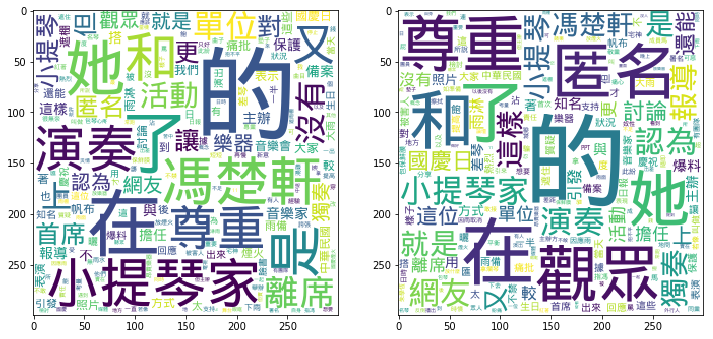

In [99]:
linux_font = r'wqy-microhei.ttc'
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2,font_path=linux_font,  height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，好像也沒有變得更清楚RRRRRRRRRRRRR
該檢討一下自己QAQ

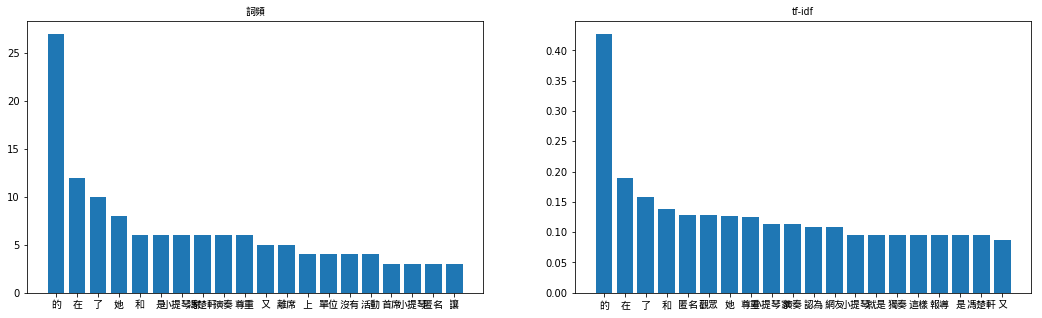

In [100]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 